<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Владислава, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
 
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Cat-Boost" data-toc-modified-id="Cat-Boost-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cat Boost</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LinearRegression</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels. tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import catboost as cb
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv',index_col=[0], parse_dates=[0]) 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Описание задачи есть, библиотеки загружены. Данные получены верно, даты обработаны, мы их переместили в индекс.Полет нормальный :)
</div>


In [3]:
data = data.resample('1H').sum()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ресемплирование провели верно. Отлично, что используем суммирование. Такой вариант интуитивно понятен и удобен.
</div>


In [4]:
data.index.is_monotonic

True

In [5]:
data.head(25)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


In [6]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [7]:
data.isna().sum()

num_orders    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Данные расположены в хронологическом порядке с 1 марта 2018 по 31 августа 2018, т.е. имеем данные за полгода.

## Анализ

<AxesSubplot:xlabel='datetime'>

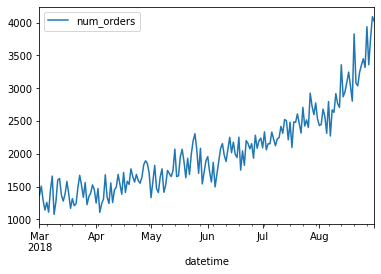

In [9]:
data.resample('1D').sum().plot()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
Графики в проекте необходимо подписать. Для удобства их также можно несколько увеличить.

</div>



Можно отметить рост заказов с марта по август.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

А с августа?
    
Наблюдается ли тренд с ускорением?  
       
</div>

Посмотрим на тренд и сезонность данных, сезонность в течение недели и в течении дня.

Text(0.5, 1.0, 'Seasonality day')

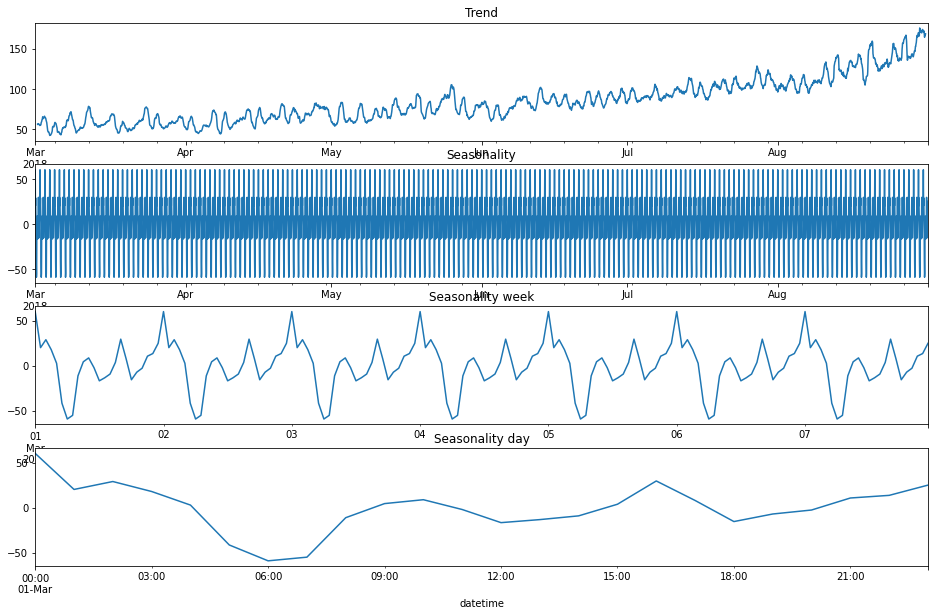

In [10]:

decomposed = seasonal_decompose(data) 

plt.figure(figsize=(16,10))
plt.subplot(411)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(412)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(413)
decomposed.seasonal['2018-03-01':'2018-03-7'].plot(ax=plt.gca())
plt.title('Seasonality week')

plt.subplot(414)
decomposed.seasonal['2018-03-01 00:00:00':'2018-03-01 23:00:00'].plot(ax=plt.gca())
plt.title('Seasonality day')

Данные имеют восходящий тренд,что говорит о нестационарности временного ряда.Так же наблюдаю сезонность в недельном интервале.\
Применим тест Дики-Фуллера для подтверждения нестационарности ряда.\
$ H_{0} $ - временной ряд является нестационарным\
$ H_{1} $ - временной ряд является стационарным.\
уровень p значимости равен 0,01.

In [11]:

alpha = 0.05
test_adf = adfuller(data)
print ('p-value: ', test_adf[1])
if test_adf[1] > alpha : 
    print ('Не можем отвергнуть нулевую гипотезу,ряд нестационарный')
else:
    print ('Отвергаем нулевую гипотезу')

p-value:  0.028940051402612906
Отвергаем нулевую гипотезу


Несмотря на тренд и сезонность тест показал, что ряд вероятнее стационарный,предполагаю,что это связано с тем,что у нас данные за полгода,если бы данные были за пару лет, то возможно и тренд не наблюдался.Так же при alpha = 0,01 гипотеза не отвергается.

Посмотрим на автокорреляцию.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также можно посмотреть и на «остатки» - данные, которые мы не можем пока интерпретировать (объяснить трендом и сезонностью).
    
По стационарности ряда - в строгом смысле он нестационарный уже потому, что обладает трендом (да еще и квадратичным местами), а в слабом - стационарный, соответственно, пригодный для того, чтобы делать предсказания.
    
    
       
</div>

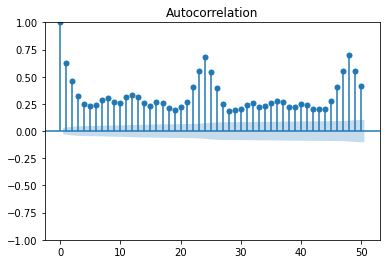

In [12]:
fig = tsaplots.plot_acf(data,lags= 50)
plt.show() 

Видим, что лаг 24 сильнее коррелирует с исходным рядом, чем соседние лаги 23 и 25. То же самое можно сказать и про лаг 48.Такая автокорреляция позволяет предположить наличие (ежедневных) сезонных колебаний.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Абсолютно точно!
</div>


In [13]:
# Выведем 20 наиболее коррелируемых лагов.
autocorr_data = pd.DataFrame(data=sm.tsa.acf(data,nlags=50), columns=['autocorrelation'])
best_corr = autocorr_data.sort_values(by='autocorrelation', ascending=False).head(25)
best_corr

,autocorrelation
0,1.000000
48,0.698465
24,0.680153
1,0.623576
49,0.549737
23,0.548974
47,0.548834
25,0.540173
2,0.464525
50,0.413873


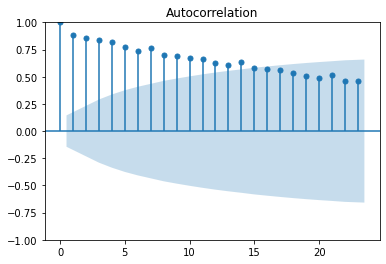

In [14]:
fig = tsaplots.plot_acf(data.resample('1D').sum())
plt.show() 

В данном случае лаги 7, 14 и 21 говорят о недельной сезонности.\
Так же видно, что первые 14 лагов имеют высокий уровень значимости.\
То, что корреляция постоянно положительная говорит о наличии тренда. Все это согласуется с тем, что мы узнали о данных, когда раскладывали их на компоненты.

In [15]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['hours'] = data.index.hour

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно
</div>

In [16]:
for lag in (best_corr.index[1:]):
    data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ок, утечки таргета нет, все корректно.
</div>

In [17]:
data['rolling_mean'] = data['num_orders'].shift().rolling(24).mean()

In [18]:
data.head()

,num_orders,day,dayofweek,hours,lag_48,lag_24,lag_1,lag_49,lag_23,lag_47,...,lag_13,lag_8,lag_7,lag_36,lag_45,lag_16,lag_9,lag_37,lag_21,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,1,NaN,NaN,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,3,2,NaN,NaN,85.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,NaN,NaN,71.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,1,3,4,NaN,NaN,66.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Обучение

In [19]:
#Разбиваем данные на трейн и тест без перемешивания и удаляем в трейне nan
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

target_train = train['num_orders']
features_train = train.drop(['num_orders'], axis=1)


target_test = test['num_orders']
features_test = test.drop(['num_orders'], axis=1)


In [20]:
print('обучающая:',features_train.shape[0]/data.shape[0])
print('тестовая:',features_test.shape[0]/data.shape[0])

обучающая: 0.8885869565217391
тестовая: 0.10009057971014493


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно. Ничего не перемешали.
</div>

In [21]:
cat_columns = ['day','dayofweek','hours']
num_columns = features_train.columns.to_list()[3:]
num_columns

['lag_48',
 'lag_24',
 'lag_1',
 'lag_49',
 'lag_23',
 'lag_47',
 'lag_25',
 'lag_2',
 'lag_50',
 'lag_46',
 'lag_22',
 'lag_26',
 'lag_12',
 'lag_3',
 'lag_11',
 'lag_13',
 'lag_8',
 'lag_7',
 'lag_36',
 'lag_45',
 'lag_16',
 'lag_9',
 'lag_37',
 'lag_21',
 'rolling_mean']

Масштабируем числовые признаки

In [22]:
scaler = StandardScaler()
scaler.fit(features_train[num_columns])
features_train[num_columns] = scaler.transform(features_train[num_columns])
features_test[num_columns] = scaler.transform(features_test[num_columns])

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь сомнительная по эффективности затея, так как у нас изначально все признаки в одной размерности (в диапазоне заказов такси в день), остальные признаки - производные от первого.
       
</div>


In [23]:
#копия для линейной регрессии, где лучше подходит OHE кодирование
features_train_ohe = features_train.copy()

# копия для финального тестирования
features_final_train = features_train.copy()


In [24]:
# Таблица для сбора полученных результатов
models_scors = pd.DataFrame(columns = ['model', 'rmse_train'])

### Cat Boost

Подберем гиперпараметры

In [25]:
cat_model = cb.CatBoostRegressor(loss_function='RMSE',verbose=False,cat_features=cat_columns)

grid = {'iterations': [100,150,200],
        'learning_rate': [0.03,0.1],
        'depth': [ 6, 8, 10]
        }

In [26]:
%%time
cat_grid_result = cat_model.grid_search(grid,
                                       X=features_train,
                                       y=target_train,
                                    cv=TimeSeriesSplit(n_splits=3)
                                       )


bestTest = 36.42119856
bestIteration = 99

0:	loss: 36.4211986	best: 36.4211986 (0)	total: 1.37s	remaining: 23.3s

bestTest = 31.57650467
bestIteration = 99

1:	loss: 31.5765047	best: 31.5765047 (1)	total: 2.09s	remaining: 16.7s

bestTest = 33.21558752
bestIteration = 149

2:	loss: 33.2155875	best: 31.5765047 (1)	total: 3.18s	remaining: 15.9s

bestTest = 31.24361704
bestIteration = 138

3:	loss: 31.2436170	best: 31.2436170 (3)	total: 4.17s	remaining: 14.6s

bestTest = 31.68560977
bestIteration = 199

4:	loss: 31.6856098	best: 31.2436170 (3)	total: 6.1s	remaining: 15.9s

bestTest = 30.42094552
bestIteration = 145

5:	loss: 30.4209455	best: 30.4209455 (5)	total: 7.94s	remaining: 15.9s

bestTest = 38.07601631
bestIteration = 99

6:	loss: 38.0760163	best: 30.4209455 (5)	total: 10.8s	remaining: 17s

bestTest = 32.93503706
bestIteration = 73

7:	loss: 32.9350371	best: 30.4209455 (5)	total: 13.4s	remaining: 16.8s

bestTest = 34.7532585
bestIteration = 149

8:	loss: 34.7532585	best: 30.420945

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Применили кросс-валидацию для временных рядов. Отлично.
</div>



In [27]:
cat_score_train = cat_model.best_score_['learn']['RMSE']
print('RMSE на тренировочном наборе:',cat_score_train)
print('Параметры модели с наилучшим результатом:',cat_grid_result['params'])

RMSE на тренировочном наборе: 16.953801074881653
Параметры модели с наилучшим результатом: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}


In [28]:
models_scors = models_scors.append({'model':'CatBoostRegressor', 'rmse_train':cat_score_train}, ignore_index=True)

### LGBMRegressor

In [29]:
oe = OrdinalEncoder()
oe.fit_transform(features_train[cat_columns])
features_train[cat_columns] = oe.transform(features_train[cat_columns])

In [30]:
%%time
parameters = {'max_depth': range(10,30,5),
              'learning_rate': [0.03,0.1],
              'num_leaves':range(10,50,10)
              
              
}
gbm = LGBMRegressor(random_state=12345)

gsearch_lgbm = GridSearchCV(gbm, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=3))
gsearch_lgbm.fit(features_train, target_train)

print("Лучшая RMSE: %0.3f" % gsearch_lgbm.best_score_)
print("Лучшие параметры:")
best_parameters = gsearch_lgbm.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Лучшая RMSE: -25.047
Лучшие параметры:
	learning_rate: 0.1
	max_depth: 10
	num_leaves: 10
CPU times: user 5min 12s, sys: 2.77 s, total: 5min 15s
Wall time: 5min 18s


In [31]:
models_scors = models_scors.append({'model': 'LGBMRegressor', 'rmse_train': abs(gsearch_lgbm.best_score_)},ignore_index=True)

### RandomForestRegressor

In [32]:
%%time
parameters = {'max_depth': [5,10,15],
              'n_estimators':[5,30,50]}
rf = RandomForestRegressor(random_state=12345)

gsearch_rf = GridSearchCV(rf, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=3))
gsearch_rf.fit(features_train, target_train)

print("Лучшая RMSE: %0.3f" % gsearch_rf.best_score_)
print("Лучшие параметры:")
best_parameters = gsearch_rf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Лучшая RMSE: -25.539
Лучшие параметры:
	max_depth: 10
	n_estimators: 50
CPU times: user 15.7 s, sys: 21 ms, total: 15.8 s
Wall time: 15.8 s


In [33]:
models_scors = models_scors.append({'model': 'RandomForestRegressor', 'rmse_train': abs(gsearch_rf.best_score_)}, ignore_index=True)

### LinearRegression

In [34]:
ohe = OneHotEncoder(sparse=False, drop='first')
train_ohe = ohe.fit_transform(features_train_ohe[cat_columns])
train_ohe = pd.DataFrame(train_ohe, columns=ohe.get_feature_names(cat_columns), index=features_train_ohe.index)
features_train_ohe[ohe.get_feature_names()] = train_ohe
features_train_ohe.drop(columns=cat_columns, inplace=True)

In [35]:
%%time
model_lin = LinearRegression()
scores_lin = cross_val_score(model_lin, features_train_ohe, target_train, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=3)) 
final_score_linear = pd.Series(scores_lin).mean()
print('RMSE на тренировочном наборе :', final_score_linear)

RMSE на тренировочном наборе : -27.277082623077106
CPU times: user 255 ms, sys: 402 ms, total: 657 ms
Wall time: 645 ms


In [36]:
models_scors = models_scors.append({'model': 'LinearRegression', 'rmse_train':  abs(final_score_linear)}, ignore_index=True)

In [37]:
models_scors.sort_values(by = 'rmse_train')

,model,rmse_train
0,CatBoostRegressor,16.953801
1,LGBMRegressor,25.046617
2,RandomForestRegressor,25.539339
3,LinearRegression,27.277083


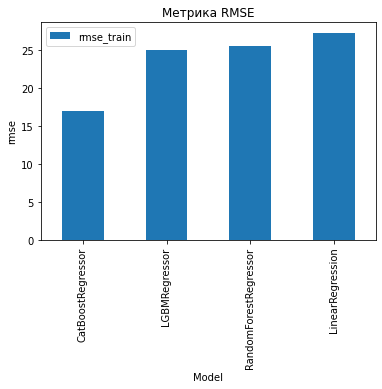

In [38]:
models_scors.sort_values(by = 'rmse_train').plot(x='model',y=['rmse_train'],kind='bar')
plt.xlabel("Model")
plt.ylabel("rmse")
plt.title('Метрика RMSE')
plt.legend(loc = 'best')
plt.show()

## Тестирование

Наименьшая RMSE у CatBoostRegressor('depth'= 6, 'iterations'= 200, 'learning_rate'= 0.1,loss_function='RMSE',verbose=False,cat_features=cat_columns)

In [39]:
best_model = cb.CatBoostRegressor(depth=6, iterations=200,learning_rate =0.1,loss_function='RMSE',verbose=False,cat_features=cat_columns)

In [40]:
best_model.fit(features_final_train,target_train)
prediction = best_model.predict(features_test)
scor = mean_squared_error(target_test, prediction,squared=False)
print(f'RMSE на тестовом наборе данных:{scor}')

RMSE на тестовом наборе данных:37.53367681505225


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Замечательное сравнение моделей, корректное тестирование, отличный результат.
</div>


# Вывод

1.  Ресемплировали данные по одному часу, поскольку для нас важно предсказания на следующий час.
2. В процессе анализа установили, что ряд имеет повышающийся тренд и сезонность суточную и недельную.Но тест Дики-Фуллера показал,что ряд стационарный, несмотря на тренд, предполгаю,что это связано с тем,что данные представленны всего за пол года, где рост заказов такси в аэропорту, как раз приходится на лето, далее должен следовать спад.
3. С помощью автокорреляции подобрала наиболее коррелирующие лаги и по ним создала новые признаки, добавив так же час, день месяца и день недели,месяц решила не добавлять поскольку,данные не за год.
4. Провела подбор параметров на 4 моделях : Cat Boost, LGBMRegressor, RandomForestRegressor и LinearRegression, где наименьшую RMSE на тренировочном наборе показала модель **Cat Boost с параметрами 'depth'= 6, 'iterations'= 200, 'learning_rate'= 0.1.**
5. Тестирование  Cat Boost на тренировочном наборе **дало RMSE = 37,53**

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Супер.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проверке**

У тебя получился отличный проект проект. Многие решения оптимальны и проактивны, отличное исследование важности лагов. В работе есть один неподписанный график, но не думаю, что это повод для повторной проверки. Приму проект сейчас. Если остались какие-то вопросы по работе, можно написать мне в телеграм @kriill.


**Желаю удачи и хорошей учебы!**😉

</div>